In [96]:

#data cleaning and stats
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#normality check
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf


#linear regression (sklearn and statsmodels)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import cross_val_score



In [50]:
# open the data file

data = pd.read_csv('./data/AirQualityUCI.csv', delimiter=';')


## Data explorations

In [51]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [52]:
data.columns=data.columns.str.replace('[(,),.]','')


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9357 non-null   object 
 1   Time         9357 non-null   object 
 2   COGT         9357 non-null   object 
 3   PT08S1CO     9357 non-null   float64
 4   NMHCGT       9357 non-null   float64
 5   C6H6GT       9357 non-null   object 
 6   PT08S2NMHC   9357 non-null   float64
 7   NOxGT        9357 non-null   float64
 8   PT08S3NOx    9357 non-null   float64
 9   NO2GT        9357 non-null   float64
 10  PT08S4NO2    9357 non-null   float64
 11  PT08S5O3     9357 non-null   float64
 12  T            9357 non-null   object 
 13  RH           9357 non-null   object 
 14  AH           9357 non-null   object 
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Let's deal with NaN data. From the data above, we know that there are 3842 rows with NaN values, which represents 17.7% of the total values. Since this correspond to a small percentage, we proceed to delete the rows that contain Nan values.


In [54]:
data = data.drop(['Unnamed: 15'], axis=1)
data = data.drop(['Unnamed: 16'], axis=1)
data = data.drop(['Date'], axis=1)
data = data.drop(['Time'], axis=1)


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COGT        9357 non-null   object 
 1   PT08S1CO    9357 non-null   float64
 2   NMHCGT      9357 non-null   float64
 3   C6H6GT      9357 non-null   object 
 4   PT08S2NMHC  9357 non-null   float64
 5   NOxGT       9357 non-null   float64
 6   PT08S3NOx   9357 non-null   float64
 7   NO2GT       9357 non-null   float64
 8   PT08S4NO2   9357 non-null   float64
 9   PT08S5O3    9357 non-null   float64
 10  T           9357 non-null   object 
 11  RH          9357 non-null   object 
 12  AH          9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 962.0+ KB


In [55]:
#inspect for any columns with null values
data.isna().sum()

COGT          114
PT08S1CO      114
NMHCGT        114
C6H6GT        114
PT08S2NMHC    114
NOxGT         114
PT08S3NOx     114
NO2GT         114
PT08S4NO2     114
PT08S5O3      114
T             114
RH            114
AH            114
dtype: int64

In [56]:
data = data.dropna()


In [57]:
#data['CO(GT)'].tail()
data.sort_values('COGT').tail()
#GT means gygatone?

,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
5690,"9,2",1778.0,-200.0,"48,2",1935.0,859.0,349.0,119.0,2643.0,1927.0,"20,9","67,5","1,6539"
6696,"9,3",-200.0,-200.0,"-200,0",-200.0,1310.0,-200.0,248.0,-200.0,-200.0,-200,-200,-200
6409,"9,4",1816.0,-200.0,"43,9",1851.0,1184.0,341.0,171.0,2405.0,2069.0,"15,4","73,0","1,2688"
5520,"9,5",1908.0,-200.0,"52,1",2007.0,952.0,325.0,180.0,2775.0,2372.0,"22,5","61,5","1,6579"
6672,"9,9",1881.0,-200.0,"50,8",1983.0,1479.0,334.0,269.0,2271.0,2523.0,"12,6","55,9","0,8142"


In [58]:
len(data[data['COGT'] == '-200'])


1592

In [59]:
data[data['COGT'] == '-200']

,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
10,-200,1011.0,14.0,"1,3",527.0,21.0,1818.0,34.0,1197.0,445.0,"10,1","60,5","0,7465"
34,-200,831.0,10.0,"1,1",506.0,21.0,1893.0,32.0,1134.0,384.0,"6,1","65,9","0,6248"
39,-200,1545.0,-200.0,"22,1",1353.0,-200.0,767.0,-200.0,2058.0,1588.0,"9,2","56,2","0,6561"
58,-200,1147.0,56.0,"6,2",821.0,109.0,1132.0,83.0,1412.0,992.0,"7,0","71,1","0,7158"
82,-200,1130.0,56.0,"5,2",773.0,70.0,1130.0,82.0,1452.0,1051.0,"12,1","61,1","0,8603"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,-200,934.0,-200.0,"2,3",609.0,70.0,976.0,55.0,1094.0,581.0,"13,7","61,1","0,9537"
7378,-200,1002.0,-200.0,"4,2",722.0,162.0,807.0,85.0,1161.0,998.0,"10,7","71,3","0,9161"
7450,-200,978.0,-200.0,"4,8",756.0,266.0,834.0,115.0,1015.0,878.0,"2,4","86,6","0,6369"
7522,-200,873.0,-200.0,"2,1",592.0,108.0,1076.0,83.0,869.0,915.0,"4,5","53,8","0,4572"


In [60]:
data['COGT'].value_counts()

-200    1592
1,4      279
1,6      275
1,5      273
1,1      262
        ... 
11,9       1
9,9        1
7          1
9,2        1
7,6        1
Name: COGT, Length: 104, dtype: int64

In [61]:
def cleaning_and_median(name_column):
    data[name_column] = data[name_column].astype(str)
    data[name_column] = data[name_column].str.replace(",",".")
    data[name_column] = data[name_column].astype(str).astype(float)
    data[name_column] = data[name_column].replace(-200,data[name_column].median())


In [62]:
data.columns

Index(['COGT', 'PT08S1CO', 'NMHCGT', 'C6H6GT', 'PT08S2NMHC', 'NOxGT',
       'PT08S3NOx', 'NO2GT', 'PT08S4NO2', 'PT08S5O3', 'T', 'RH', 'AH'],
      dtype='object')

In [63]:
#columns_clean_median = ['CO(GT)','C6H6(GT)','T', 'RH', 'AH']

for i in data.columns:
    cleaning_and_median(i)

In [64]:
data

,COGT,PT08S1CO,NMHCGT,C6H6GT,PT08S2NMHC,NOxGT,PT08S3NOx,NO2GT,PT08S4NO2,PT08S5O3,T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [65]:
data['NMHCGT'].median()

-200.0

In [66]:
data['NMHCGT'].value_counts()

-200.0    8443
 66.0       14
 40.0        9
 29.0        9
 93.0        8
          ... 
 131.0       1
 102.0       1
 383.0       1
 228.0       1
 541.0       1
Name: NMHCGT, Length: 430, dtype: int64

since the median is -200, we decide to eliminate this column

In [67]:
data = data.drop(['NMHCGT'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COGT        9357 non-null   float64
 1   PT08S1CO    9357 non-null   float64
 2   C6H6GT      9357 non-null   float64
 3   PT08S2NMHC  9357 non-null   float64
 4   NOxGT       9357 non-null   float64
 5   PT08S3NOx   9357 non-null   float64
 6   NO2GT       9357 non-null   float64
 7   PT08S4NO2   9357 non-null   float64
 8   PT08S5O3    9357 non-null   float64
 9   T           9357 non-null   float64
 10  RH          9357 non-null   float64
 11  AH          9357 non-null   float64
dtypes: float64(12)
memory usage: 950.3 KB


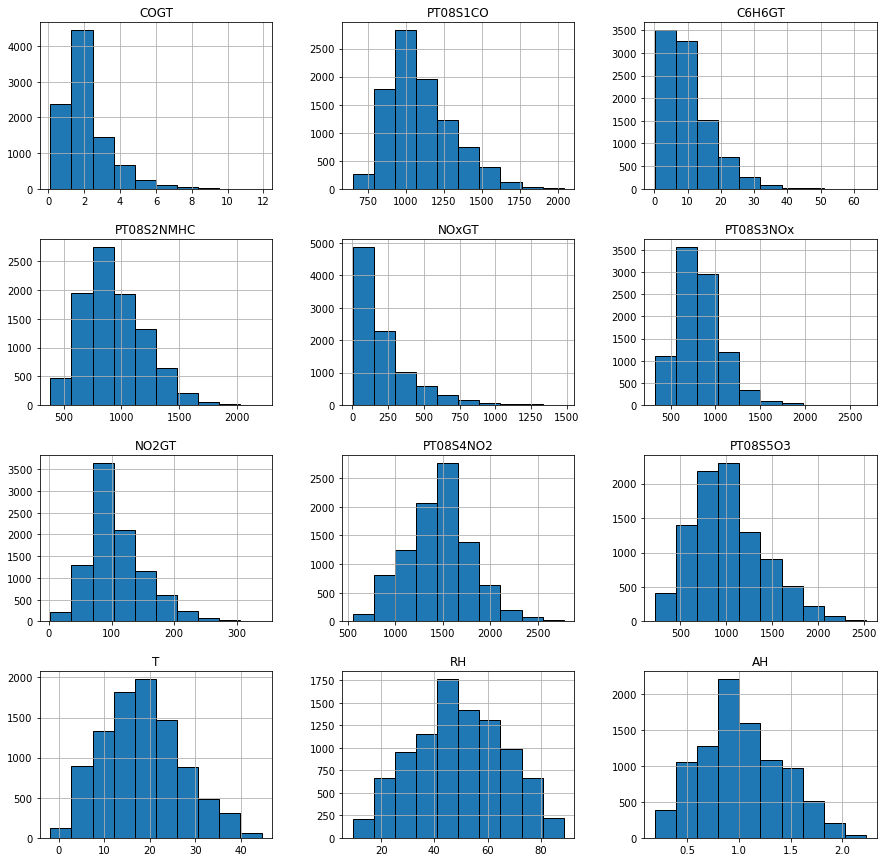

In [68]:
data.hist(figsize=(15,15), edgecolor = 'black');


In [69]:
# log features
log_names = [f'{column}_log' for column in data.columns]
data_log = np.log(data)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data.apply(normalize)

data_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COGT        9357 non-null   float64
 1   PT08S1CO    9357 non-null   float64
 2   C6H6GT      9357 non-null   float64
 3   PT08S2NMHC  9357 non-null   float64
 4   NOxGT       9357 non-null   float64
 5   PT08S3NOx   9357 non-null   float64
 6   NO2GT       9357 non-null   float64
 7   PT08S4NO2   9357 non-null   float64
 8   PT08S5O3    9357 non-null   float64
 9   T           9357 non-null   float64
 10  RH          9357 non-null   float64
 11  AH          9357 non-null   float64
dtypes: float64(12)
memory usage: 950.3 KB


In [70]:
data_log_norm['COGT'].value_counts()

-0.399588    1956
-0.772795     305
-0.474229     279
-0.324946     275
-0.698154     262
             ... 
 7.363129       1
 5.347809       1
 5.870299       1
 5.571733       1
 3.705695       1
Name: COGT, Length: 96, dtype: int64

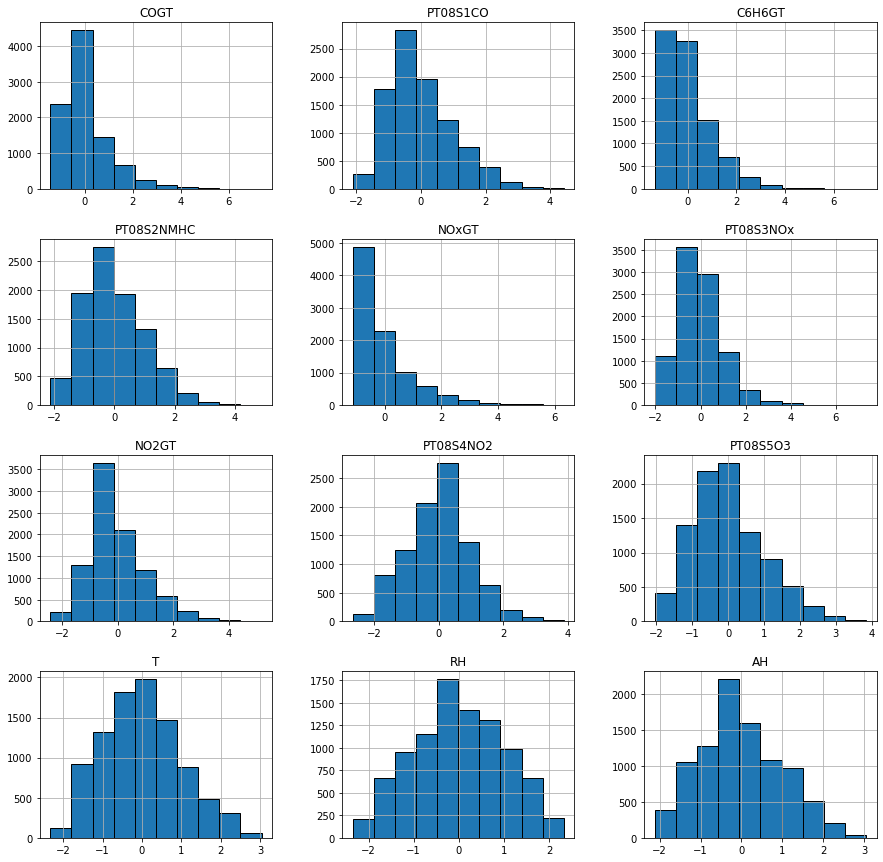

In [71]:
data_log_norm.hist(figsize=(15,15), edgecolor = 'black');


## correlation visualization

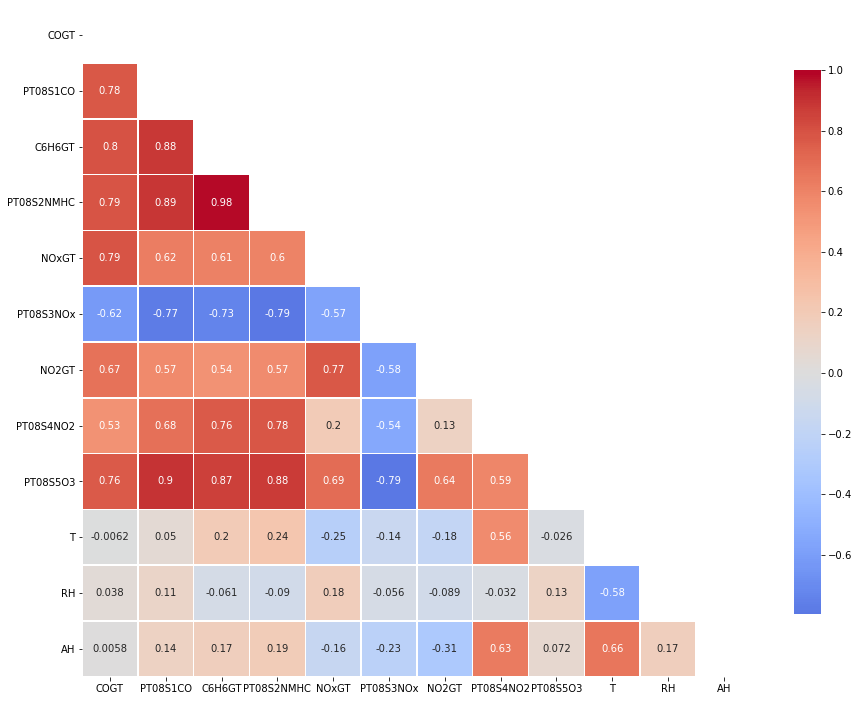

In [72]:
#visualize correlation using heatmap
corr = data_log_norm.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

We can see that the variables that are positively correlated with T are C6h6GT, PT082SNMHC AND PT08S4NO2

In [73]:
#Conduct normality check
#normality_check(data)

In [74]:
X = data.drop('T', axis=1)
y = data['T']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      T   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          6.455e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:32:00   Log-Likelihood:                         -21091.
No. Observations:                9357   AIC:                                  4.220e+04
Df Residuals:                    9346   BIC:                                  4.228e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COGT          -0.3131      0.042     -7.503      0.000      -0.395      -0.231
PT08S1CO       0.0019      0.000      6.223      0.000       0.001       0.002
C6H6GT        -0.5598      0.014    -40.201      0.000      -0.587      -0.533
PT08S2NMHC     0.0183      0.000     39.767      0.000       0.017       0.019
NOxGT          0.0021      0.000      7.140      0.000       0.002       0.003
PT08S3NOx      0.0032      0.000     25.590      0.000       0.003       0.003
NO2GT          0.0013      0.001      1.242      0.214      -0.001       0.003
PT08S4NO2      0.0042      0.000     17.545      0.000       0.004       0.005
PT08S5O3      -0.0029      0.000    -16.366      0.000      -0.003      -0.003
RH            -0.3324      0.002   -184.055      0.000      -0.336      -0.329
AH            14.8134      0.120    123.058      0.000      14.577      15.049
==============================================================================
Omnibus:                     1294.107   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3354.555
Skew:                           0.774   Prob(JB):                         0.00
Kurtosis:                       5.491   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
X_norm = data_log_norm.drop('T', axis=1)
y_norm = data_log_norm['T']

import statsmodels.api as sm
X_int_norm = sm.add_constant(X_norm)
model = sm.OLS(y_norm,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:32:00   Log-Likelihood:                -802.73
No. Observations:                9357   AIC:                             1629.
Df Residuals:                    9345   BIC:                             1715.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1772      0.070    -16.843      0.000      -1.314      -1.040
COGT          -0.0311      0.005     -6.495      0.000      -0.040      -0.022
PT08S1CO    5.034e-05   3.67e-05      1.370      0.171   -2.17e-05       0.000
C6H6GT        -0.0419      0.002    -17.944      0.000      -0.046      -0.037
PT08S2NMHC     0.0013   8.26e-05     15.216      0.000       0.001       0.001
NOxGT          0.0003   3.33e-05      7.546      0.000       0.000       0.000
PT08S3NOx   9.822e-05   2.53e-05      3.879      0.000    4.86e-05       0.000
NO2GT         -0.0001      0.000     -1.131      0.258      -0.000       0.000
PT08S4NO2      0.0006   2.84e-05     20.586      0.000       0.001       0.001
PT08S5O3      -0.0003   2.02e-05    -15.252      0.000      -0.000      -0.000
RH            -0.0391      0.000   -183.582      0.000      -0.039      -0.039
AH             1.6474      0.015    113.171      0.000       1.619       1.676
==============================================================================
Omnibus:                     1270.350   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3472.724
Skew:                           0.745   Prob(JB):                         0.00
Kurtosis:                       5.586   Cond. No.                     6.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:


f_names = ['T~COGT', 'T~PT08S1CO', 'T~C6H6GT', 'T~PT08S2NMHC', 'T~NOxGT','T~PT08S3NOx','T~NO2GT','T~PT08S4NO2','T~PT08S5O3','T~RH','T~AH']


In [77]:
for i in f_names:
    print(i)

    

T~COGT
T~PT08S1CO
T~C6H6GT
T~PT08S2NMHC
T~NOxGT
T~PT08S3NOx
T~NO2GT
T~PT08S4NO2
T~PT08S5O3
T~RH
T~AH


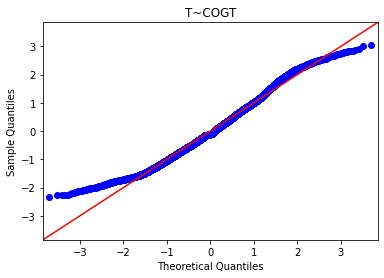

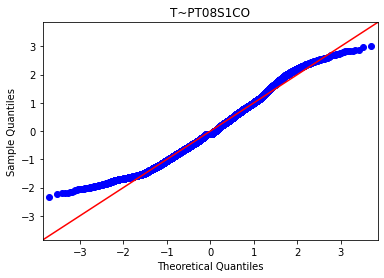

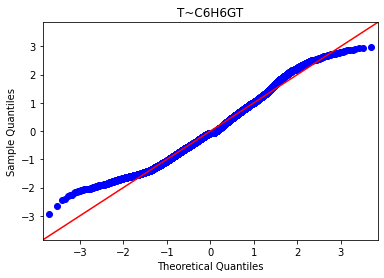

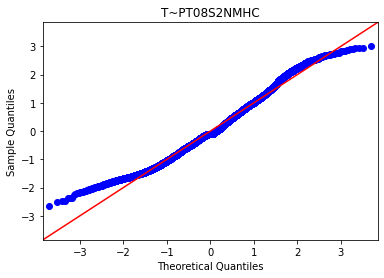

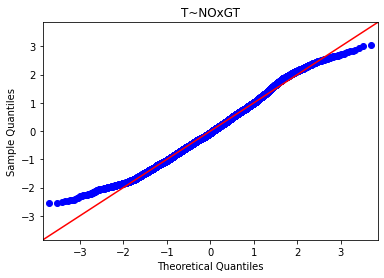

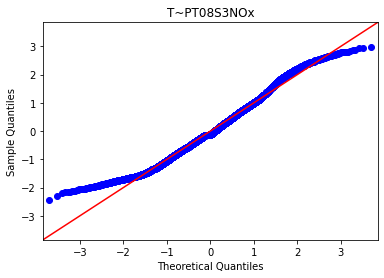

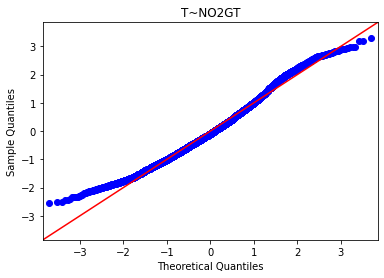

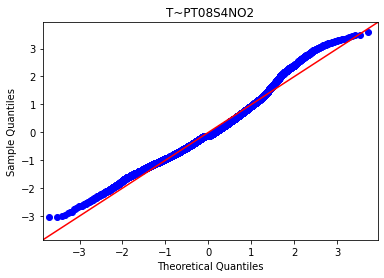

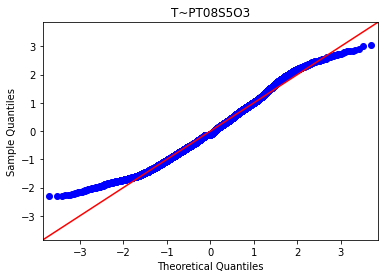

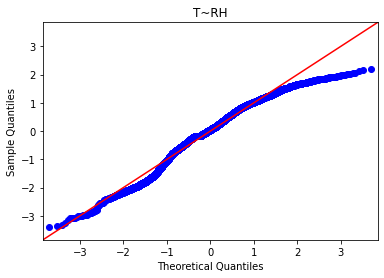

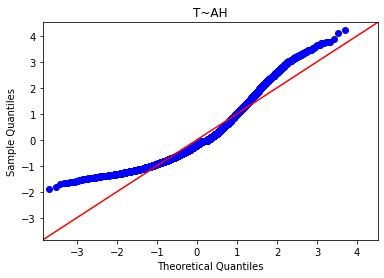

In [78]:
import warnings
warnings.filterwarnings('ignore')

for i in f_names:
    model = smf.ols(formula=i, data=data).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(i)
    fig.show();




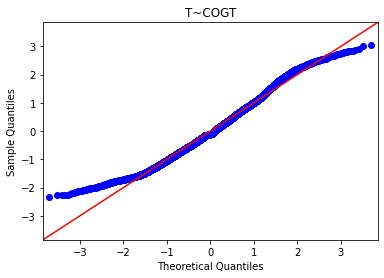

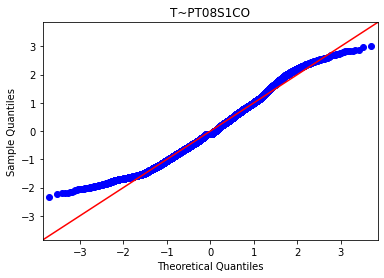

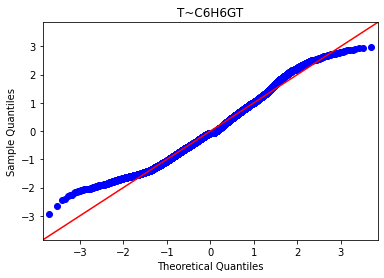

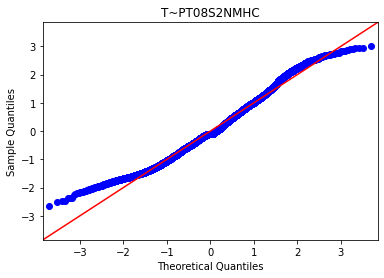

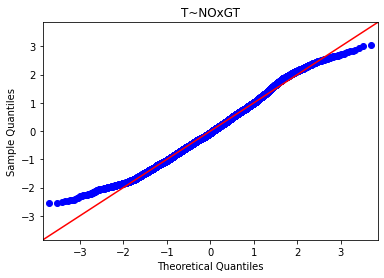

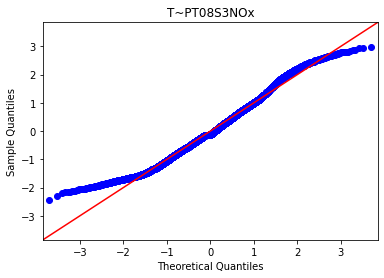

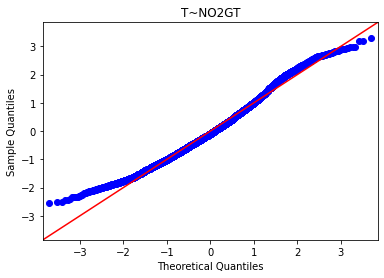

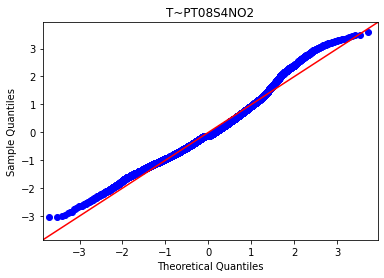

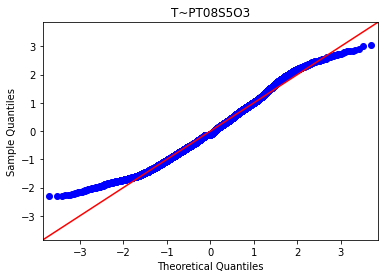

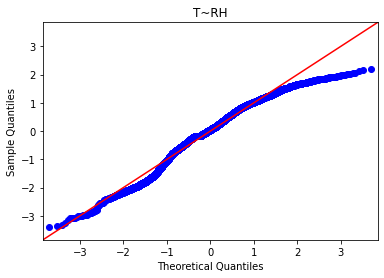

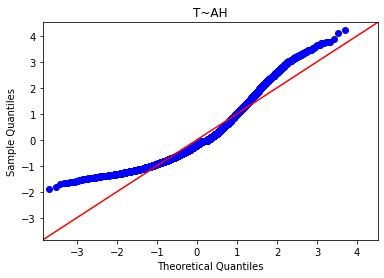

In [79]:
import warnings
warnings.filterwarnings('ignore')

for i in f_names:
    model = smf.ols(formula=i, data=data_log_norm).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(i)
    fig.show();


In [80]:
data.corr()
abs(data.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.8) & (df.cc <1)]

,cc
pairs,
"(PT08S2NMHC, C6H6GT)",0.981673
"(PT08S5O3, PT08S1CO)",0.899493
"(PT08S2NMHC, PT08S1CO)",0.893070
"(PT08S1CO, C6H6GT)",0.883979
"(PT08S2NMHC, PT08S5O3)",0.880710
"(C6H6GT, PT08S5O3)",0.865864
"(C6H6GT, COGT)",0.802252


PT08S2NMHC = 3, C6H6GT = 4, PTO8S5O3 = 3, PT09S1CO = 3, COGT = 1

In [81]:
data = data.drop(['C6H6GT'], axis=1)


In [82]:
X = data.drop('T', axis=1)
y = data['T']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      T   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          6.041e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:32:01   Log-Likelihood:                         -21837.
No. Observations:                9357   AIC:                                  4.369e+04
Df Residuals:                    9347   BIC:                                  4.377e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COGT          -0.7763      0.043    -17.875      0.000      -0.861      -0.691
PT08S1CO       0.0049      0.000     15.596      0.000       0.004       0.006
PT08S2NMHC     0.0068      0.000     17.413      0.000       0.006       0.008
NOxGT       -4.47e-05      0.000     -0.144      0.885      -0.001       0.001
PT08S3NOx      0.0060      0.000     52.504      0.000       0.006       0.006
NO2GT          0.0213      0.001     21.447      0.000       0.019       0.023
PT08S4NO2      0.0025      0.000      9.610      0.000       0.002       0.003
PT08S5O3      -0.0037      0.000    -19.815      0.000      -0.004      -0.003
RH            -0.3234      0.002   -166.632      0.000      -0.327      -0.320
AH            16.4226      0.123    133.577      0.000      16.182      16.664
==============================================================================
Omnibus:                      768.736   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2073.005
Skew:                           0.465   Prob(JB):                         0.00
Kurtosis:                       5.110   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
data.corr()
abs(data.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.8) & (df.cc <1)]

,cc
pairs,
"(PT08S1CO, PT08S5O3)",0.899493
"(PT08S1CO, PT08S2NMHC)",0.893070
"(PT08S5O3, PT08S2NMHC)",0.880710


In [84]:
data = data.drop(['PT08S5O3'], axis=1)
data = data.drop(['PT08S2NMHC'], axis=1)


In [85]:
X = data.drop('T', axis=1)
y = data['T']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      T   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          7.137e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:32:02   Log-Likelihood:                         -22097.
No. Observations:                9357   AIC:                                  4.421e+04
Df Residuals:                    9349   BIC:                                  4.427e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COGT          -0.7735      0.044    -17.401      0.000      -0.861      -0.686
PT08S1CO       0.0048      0.000     18.954      0.000       0.004       0.005
NOxGT          0.0003      0.000      0.907      0.365      -0.000       0.001
PT08S3NOx      0.0067   9.26e-05     72.210      0.000       0.007       0.007
NO2GT          0.0219      0.001     21.522      0.000       0.020       0.024
PT08S4NO2      0.0045      0.000     22.696      0.000       0.004       0.005
RH            -0.3391      0.002   -183.303      0.000      -0.343      -0.335
AH            16.2300      0.117    138.150      0.000      16.000      16.460
==============================================================================
Omnibus:                      905.449   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2023.097
Skew:                           0.602   Prob(JB):                         0.00
Kurtosis:                       4.934   Cond. No.                     9.11e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
data.corr()
abs(data.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.8) & (df.cc <1)]

,cc
pairs,


In [87]:
data.corr()
abs(data.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.7) & (df.cc <1)]

,cc
pairs,
"(COGT, NOxGT)",0.791624
"(COGT, PT08S1CO)",0.775029
"(PT08S1CO, PT08S3NOx)",0.769482
"(NO2GT, NOxGT)",0.768881


In [88]:
data = data.drop(['NOxGT'], axis=1)
data = data.drop(['PT08S1CO'], axis=1)

In [89]:
X = data.drop('T', axis=1)
y = data['T']

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      T   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          9.152e+04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:32:02   Log-Likelihood:                         -22278.
No. Observations:                9357   AIC:                                  4.457e+04
Df Residuals:                    9351   BIC:                                  4.461e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
COGT          -0.7119      0.035    -20.190      0.000      -0.781      -0.643
PT08S3NOx      0.0067   9.25e-05     72.736      0.000       0.007       0.007
NO2GT          0.0320      0.001     41.698      0.000       0.030       0.033
PT08S4NO2      0.0071      0.000     56.069      0.000       0.007       0.007
RH            -0.3210      0.002   -205.110      0.000      -0.324      -0.318
AH            15.5236      0.112    138.858      0.000      15.304      15.743
==============================================================================
Omnibus:                      973.047   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1995.573
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       4.827   Cond. No.                     7.07e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
data.corr()
abs(data.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.7) & (df.cc <1)]

,cc
pairs,


In [98]:
from sklearn.model_selection import train_test_split

X = data.drop('T', axis=1)
y = data['T']

# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



In [99]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

5.647819033100378

In [101]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_20_results = cross_val_score(linreg, X, y, cv=20, scoring=mse)

In [106]:
cv_5_results.mean(), cv_10_results.mean(), cv_20_results.mean()

(8.610879055702798, 6.8458765897824545, 6.409304929957949)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

7485 1872 7485 1872
Train Mean Squarred Error: 5.5911540080247795
Test Mean Squarred Error: 5.565575357246956


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.9251954498646173

In [116]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top interaction: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:1])

0
Top interaction: [('PT08S4NO2', 'AH', 0.949)]


In [117]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact['PT08S4NO2_AH'] = X['PT08S4NO2'] * X['AH']

interact_horse_origin = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interact_horse_origin

0.9488482786055951

In [118]:
import statsmodels.api as sm
X_interact_2 = sm.add_constant(X_interact)
model = sm.OLS(y,X_interact)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      T   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.392e+05
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        18:02:57   Log-Likelihood:                         -19627.
No. Observations:                9357   AIC:                                  3.927e+04
Df Residuals:                    9350   BIC:                                  3.932e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
COGT            -0.2548      0.027     -9.400      0.000      -0.308      -0.202
PT08S3NOx        0.0012    9.6e-05     11.984      0.000       0.001       0.001
NO2GT            0.0054      0.001      8.193      0.000       0.004       0.007
PT08S4NO2        0.0135      0.000    110.683      0.000       0.013       0.014
RH              -0.3565      0.001   -284.787      0.000      -0.359      -0.354
AH              31.4591      0.207    152.188      0.000      31.054      31.864
PT08S4NO2_AH    -0.0109      0.000    -84.415      0.000      -0.011      -0.011
==============================================================================
Omnibus:                     2119.768   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6221.155
Skew:                           1.178   Prob(JB):                         0.00
Kurtosis:                       6.225   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

data['NMHC(GT)'].value_counts()

In [ ]:
def cleaning_and_median(name_column):
    data[name_column] = data[name_column].astype(str).astype(float)
    data[name_column] = data[name_column].replace(-200,data[name_column].median())

In [ ]:
data

In [ ]:
data['CO(GT)'] = data['CO(GT)'].replace(","," ")
data['CO(GT)']

In [ ]:
data['CO(GT)'] = data['CO(GT)'].astype(str)
data['CO(GT)'] = data['CO(GT)'].str.replace(",",".")
data['CO(GT)']

In [ ]:
data['CO(GT)'] = data['CO(GT)'].astype(str).astype(float)

In [ ]:
data['CO(GT)']=data['CO(GT)'].replace(-200,data['CO(GT)'].median())


In [ ]:
data['CO(GT)'].value_counts()

In [ ]:
data['C6H6(GT)'] = data['C6H6(GT)'].str.replace(",",".")
data['C6H6(GT)']

In [ ]:
data['T'] = data['T'].str.replace(",",".")
data['T']

In [ ]:
data['RH'] = data['RH'].str.replace(",",".")
data['RH']

In [ ]:
data['AH'] = data['AH'].str.replace(",",".")
data['AH']

From this first screening, we can see that sqft_basement is an object, so we convert it into float. But when we try to apply the function astype, it gives an error. That's why we have to epxlore the column a little further. By reading the corresponding error of astype and using the function .value_counts() we can see that the problem is that there is the sign "?". 


In [ ]:

data['sqft_basement'].value_counts()

To proceed with our analysis, we detete the rows that contain "?" 

In [ ]:
data = data[(data.sqft_basement != '?' )]
data.info()

We can now proceed to convert sqft_basement into a float type

In [ ]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [ ]:
data.info()

Above we have confirm that the sqft_basement is now a float.

## CATEGORICAL VS CONTINUOUS DATA ANALYSIS

Now let's identify which variables are categorical and which ones are continuous. We will do it by plotting the data. From the graphs below, we can determine that waterfront, view, condition, grade, years built, renovated year, number of bedrooms, numbero of bathrooms and number of floors are categorical variables. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

 # crate the figure and axes
fig, axes = plt.subplots(7, 3, figsize=(24, 30))   

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(data.columns):
    
    data.plot(kind='scatter', x=c, y='price', ax=axe[i], alpha=0.4, color='b')

We conver the "years_built" variable into a continous variable by calculating the years since it was renovated.

In [ ]:
data['years_built'] = 2022 - data['yr_built']
data.info()


## EFFECT OF RENOVATION ON PRICE 

We start our analysis determining the effect of renovation in house prices. Let's explore the data a bit further.

In [ ]:
data.yr_renovated.value_counts()

From the data, we can observed that some years of renovation correspond to 0, which means that these houses have not been renovated. 
What we are going to do, is to create 2 grups, one of houses that have not been renovated and the other one of renovated houses. After that, we will perform a t-test to determine whether there is a significant change between these two groups. 


Hypothesis:
H0 = there are no differences between renovated and non-renovated houses
Ha = there are differences between renovated and non-renovated houses


In [ ]:
no_renovated = data[data.yr_renovated == 0]['price']
renovated = data[data.yr_renovated != 0]['price']

# Calculate the 2-sided p-value for a t-test comparing the renovated vs no-renovated groups
from scipy import stats

stats.ttest_ind(no_renovated, renovated, equal_var=False)[1]


The above result indicates that there is a signfincant difference between renovated and non-renovated houeses. Which one is more expensive? Let's see:

In [ ]:
print(no_renovated.mean(), renovated.mean())

The renovated houses are more expensive. How much?  1.4-fold more expensive, as seen below. 

In [ ]:
fold_increase = (renovated.mean()/no_renovated.mean())
fold_increase

Based on this data, we select only the non-renovated houses, as our main is to find the cheapest houses for the WHPO.

In [ ]:
data_new = data.drop(data[data.yr_renovated != 0].index)
data_new.yr_renovated.value_counts() #to confirm that we only selected the non-renovated

In [ ]:
data_new.info()

## EFFECTS OF WATERVIEW ON PRICE

To study the effect of waterviews on price, we performed the same analysis that with renovation: a t-test to compare houses with and without waterview 

In [ ]:
no_water_view = data_new[data_new.waterfront == 0]['price']
water_view = data_new[data_new.waterfront != 0]['price']

# Calculate the 2-sided p-value for a t-test comparing the renovated vs no-renovated groups
from scipy import stats

stats.ttest_ind(water_view, no_water_view, equal_var=False)[1]

The t-test analysis confirm that there is a statistically signifcant differences between houses with and whithout waterview. 
Below we can see the average price for both groups.

In [ ]:
print(water_view.mean(), no_water_view.mean())

Based on the data above, we select only the houses that do not have waterviews for our further analysis

In [ ]:
data_new = data_new.drop(data_new[data_new.waterfront != 0].index)
data_new

In [ ]:
data_new.waterfront.value_counts() #to confirm that we only have the houses without waterviews

In [ ]:
data_new.info()

## EFFECTS OF ZIPCODES ON PRICE

We want now to determine which are the zipcodes that are most expensive. Since zipcodes is a categorical variable, we will use get_dummies to work with tat.

In [ ]:
zipcode_dummies = pd.get_dummies(data_new['zipcode'], prefix='zip', drop_first=True)

In [ ]:
zipcode_analysis = data.drop(['zipcode'], axis=1)
zipcode_analysis = pd.concat([data_new['price'], zipcode_dummies], axis=1)
zipcode_analysis.head()




In [ ]:
X_zip = zipcode_analysis.drop('price', axis=1)
y_zip = zipcode_analysis['price']

import statsmodels.api as sm
X_zip_int = sm.add_constant(X_zip)
model = sm.OLS(y_zip,X_zip_int).fit()
model.summary()

The adjusted R-squared value for the whole mode is 0.457, which is a very low value. This means that only 45% of the price variability can be explained by zipcode. However, in this analysis we want to focus on particular zipcodes. 

From this analysis we can see that several zipocdes positively and signifcantly increase the price (coefient positive and p < 0.05), and some that do not. We also observe that even some of them have a negative correlation with price, they are not significant. 

We want to identify which ones are the ones that positively and signficnatly increase the price and which ones do not. 

In [ ]:
columns = ['index','pvalue']

pvalue_positive_table = pd.DataFrame(columns=columns)
pvalue_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model.pvalues):
    if a < 0.05:
        pvalue_positive_table.loc[i] = [i,a]
    else:
        pvalue_negative_table.loc[i] = [i,a]




In [ ]:
pvalue_positive_table

In [ ]:
pvalue_negative_table

In [ ]:
index = pvalue_negative_table.index
index

In [ ]:
zipcodes_of_interstet = []

for i in index:
    zipcodes_of_interstet.append(zipcode_analysis.columns[i])

zipcodes_of_interstet_name = []



Below, we can see the zipcodes of interset, which means, the zipcodes that do not signficnatly incrase the house prices. Herein, these zipcodes are the ones that will have the lowest house prices

In [ ]:
for i in zipcodes_of_interstet:
     zipcodes_of_interstet_name.append(i[-5:])

zipcodes_of_interstet_name

In [ ]:
index_NO_interest = pvalue_positive_table.index


zipcodes_of_NO_interstet = []

for i in index_NO_interest:
    zipcodes_of_NO_interstet.append(zipcode_analysis.columns[i])

zipcodes_of_NO_interstet_name = []

for i in zipcodes_of_NO_interstet:
     zipcodes_of_NO_interstet_name.append(i[-5:])

zipcodes_of_NO_interstet_name

In [ ]:
#just to refresh our data:

data_new

In [ ]:
#as mentioend above, now we want to select only the houses corresponding to our zipcodes of interest

data_new2 =  data_new[data_new['zipcode'].isin(zipcodes_of_interstet_name)]
data_new2.zipcode.value_counts()

In [ ]:
data_new2.info()

## EFFECTS OF CONDITION ON PRICE

Condition is also a categorical variable, and we will apply get_dummies to deal with it. 

In [ ]:
condition_dummies = pd.get_dummies(data_new2['condition'], prefix='cond', drop_first=True)

In [ ]:
condition_analysis = data_new2.drop(['condition'], axis=1)
condition_analysis = pd.concat([data_new2['price'], condition_dummies], axis=1)
condition_analysis.head(10)


In [ ]:
X_cond = condition_analysis.drop('price', axis=1)
y_cond = condition_analysis['price']

X_cond_int = sm.add_constant(X_cond)
model_cond = sm.OLS(y_cond,X_cond_int).fit()
model_cond.summary()

The adjusted R2-value is very low (0.015). It means that only 1.5% of the price variablity can be explained by this model. However, we have performed this analysis to focus on the value of each condition individually. 

Similar to zipcodes, there are some conditoins that signicnatly and positively increase the house price. We perform the same analysis to udnerstand which conditions impact the price and which ones do not. 

In [ ]:
columns = ['index','pvalue']

condition_pvalue_positive_table = pd.DataFrame(columns=columns)
condition_pvalue_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model_cond.pvalues):
    if a < 0.05:
        condition_pvalue_positive_table.loc[i] = [i,a]
    else:
        condition_pvalue_negative_table.loc[i] = [i,a]


condition_pvalue_positive_table

In [ ]:
condition_pvalue_negative_table

In [ ]:
cond_grade = condition_pvalue_negative_table.index
cond_grade

In [ ]:
cond_of_interstet = []

for i in cond_grade:
    cond_of_interstet.append(condition_analysis.columns[i])

cond_of_interstet

In [ ]:
cond_grade_negative = condition_pvalue_positive_table.index
cond_grade_negative

cond_no_interstet = []

for i in cond_grade_negative:
    cond_no_interstet.append(condition_analysis.columns[i])

cond_no_interstet

In [ ]:
data_new2.condition.value_counts()


From all the analysis above, we can conclude that condition 3 and above signficnatly increase the price of the houses. However, we can't filter our data only based on condition 1 and 2, because this only correspond to 27 datapoints. We will proceed with the analysis without this filter, but this is an insight that we will give to our clients.

## EFFECTS OF GRADE ON PRICE

Grade is also a categorical variable, and we will apply get_dummies to deal with it. 

In [ ]:
grade_dummies = pd.get_dummies(data_new2['grade'], prefix='grd', drop_first=True)

grade_analysis = data_new2.drop(['grade'], axis=1)
grade_analysis = pd.concat([data_new2['price'], grade_dummies], axis=1)
grade_analysis.head(10)

In [ ]:
X_grade = grade_analysis.drop('price', axis=1)
y_grade = grade_analysis['price']

X_grade_int = sm.add_constant(X_grade)
model_grade = sm.OLS(y_grade,X_grade_int).fit()
model_grade.summary()

Similar to condition, the adjusted R2-value is very low (0.433). This means that only 43.3% of the price variability can be explained by this model. However, we have performed this analysis to focus on the value of each grade indivually. 

Similar to grade, there are some grades that signficantly and positively increase the house price. We perform the same analysis to understand which grades impact the price and which ones do not. 

In [ ]:
columns = ['index','pvalue']

grade_pvalue_positive_table = pd.DataFrame(columns=columns)
grade_pvalue_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model_grade.pvalues):
    if a < 0.05:
        grade_pvalue_positive_table.loc[i] = [i,a]
    else:
        grade_pvalue_negative_table.loc[i] = [i,a]


grade_pvalue_positive_table

In [ ]:
grade_pvalue_negative_table

In [ ]:
index_grade = grade_pvalue_negative_table.index
index_grade

In [ ]:
grade_analysis

In [ ]:
grade_of_interstet = []

for i in index_grade:
    grade_of_interstet.append(grade_analysis.columns[i])

grade_of_interstet

In [ ]:
index_grade_pos = grade_pvalue_positive_table.index

grade_no_interstet = []

for i in index_grade_pos:
    grade_no_interstet.append(grade_analysis.columns[i])

grade_no_interstet

From the analysis above, we can determine that grade 9 and above significantly increase the house price, and therefore we  select only the houses with grade bewlow 9, as they are the cheaper ones. 

In [ ]:
     
grade_of_interstet_name = []

for i in grade_of_interstet:
     grade_of_interstet_name.append(i[-1:])

grade_of_interstet_name

In [ ]:
# we select houses below grade 9
data_new3 =  data_new2[data_new2['grade'].isin(grade_of_interstet_name)]

data_new3.grade.value_counts()

In [ ]:
data_new3.info()

## EFFECTS OF NUMBER OF BEDROOMS ON PRICE


In [ ]:
bedrooms_dummies = pd.get_dummies(data_new3['bedrooms'], prefix='bdr', drop_first=True)

bedrooms_analysis = data_new3.drop(['grade'], axis=1)
bedrooms_analysis = pd.concat([data_new3['price'], bedrooms_dummies], axis=1)
bedrooms_analysis.head(10)

In [ ]:
X_bed = bedrooms_analysis.drop('price', axis=1)
y_bed = bedrooms_analysis['price']

X_bed_int = sm.add_constant(X_bed)
model_beds = sm.OLS(y_bed,X_bed_int).fit()
model_beds.summary()

The adjusted R-squared value for the whole model is 0.132, which is a very low value. This means that only 13.2% of the price variability can be explained by this model.

In [ ]:
columns = ['index','pvalue']

bedrooms_pvalue_positive_table = pd.DataFrame(columns=columns)
bedrooms_pvalue_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model_beds.pvalues):
    if a < 0.05:
        bedrooms_pvalue_positive_table.loc[i] = [i,a]
    else:
        bedrooms_pvalue_negative_table.loc[i] = [i,a]


bedrooms_pvalue_positive_table

In [ ]:
bedrooms_pvalue_negative_table

What this analysis indicate, is that the number of bedrooms always have an impact on the price. And the more number of rooms, the more expensive the price (since the coeficient increases with number of rooms).
It will be up to WHPO to decide the number of rooms they want for their houses. Maybe they want one room for single people, or 3 for families.... but they need to be aware that the bigger the number of rooms, the more expensive the houses.
Considering that WHPO may be intersted in different houses sizes, we won't furhter narrow our subset of intersting houses. 

Now that we have selected the houses with the lowest price, we want to determine how several continuous variables affect the price of the selected houses. 


## EFFECTS OF YEARS SINCE BUILT, SQFT LIVING AREA AND SQFT LIVING LOT ON PRICE 

In [ ]:
data_new3.columns

In [ ]:
#We focus on the following variables, which are continuous variables:

continuous_norm = ['price','sqft_living','sqft_lot', 'years_built']


Let's see if these variables follow a normal distribution

In [ ]:

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_new3[continuous_norm].hist(ax = ax);

We try to improve the distribution by logaritmic transformation and normalization

In [ ]:


# Log transform and normalize
data_cont = data_new3[continuous_norm]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

data_log_norm.info()

Let's visualize the changes in the distribution:

In [ ]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_log_norm.hist(ax = ax);

In [ ]:
#let's confirm the data that we have

data_log_norm

Now we create a regression model with these variables:

In [ ]:
X_new = data_log_norm.drop('price_log', axis=1)
y_new = data_log_norm['price_log']

import statsmodels.api as sm
X_new_int = sm.add_constant(X_new)
model_new = sm.OLS(y_new,X_new_int).fit()
model_new.summary()


The adjusted R-squared value for the whole mode is 0.446, which is a  low value. This means that only 44.6% of the price variability can be explained by this model.
To try to improve our model, let's check the colinearility of the variables:

In [ ]:
data_log_norm.corr()
abs(data_log_norm.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data_log_norm.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc <1)]

From the analysis above, it doesn't seem to be any considerable correlation between variables. Now let's study interaction between variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_new, y_new, scoring='r2', cv=crossvalidation))
baseline

In [ ]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X_new.columns, 2)

data = X_new.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y_new, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top interaction: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:1])

So from the analysis above, there are not interactions or colinearitly that we should we aware and adjust our model based on. As such, let's refresh our model and gain some insights: 

In [ ]:
X_new = data_log_norm.drop('price_log', axis=1)
y_new = data_log_norm['price_log']

import statsmodels.api as sm
X_new_int = sm.add_constant(X_new)
model_new = sm.OLS(y_new,X_new_int).fit()
model_new.summary()

SQFT living area and lot have a significant positive contribution to the house price in our subset of interest (the more area, the more expensive).
Years since built has a significant negative contribution to the price (the oldest, the cheapest).
sqft living area is the variable that affects the most to the price, as it has the highest coefficient value (coef = 0.56) and a p_value < 0.05.


## MODEL VALIDATION

Finally we validate our model creating a test sample with 20% of the datapoints. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

The fact that there are no big difference between Test mean squarred error and Train mean squarred error validates our model. 

## CONCLUSIONS
We provide the following business recomendations:

* **Recommendations 1**: Look for non-renovated houses.
* **Recommendations 2**: Look for houses that have no waterview.
* **Recommendations 3**: Look for houses in the following zipcodes: 98002, 98003, 98022, 98023, 98030, 98031, 98032, 98055, 98106, 98148, 98168, 98178, 98188, 98198.
* **Recommendations 4**: Look for houses below condition 3.
* **Recommendations 5**: Look for houses below grade 9.
* **Recommendations 6**: center your search on houses with the lowest sqft living. Older houses will be cheaper